In [9]:
#Maxime Bardiau
#Tâche 8

In [10]:
from pymatgen import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#téléchargement de la structure de bande
structure = MPRester("KGkLFN8rUMTD0Z1V").get_bandstructure_by_material_id("mp-20289")

In [12]:
#Variables utiles
plot = plotter.BSPlotter(structure)
data = plot.bs_plot_data()

<h2>Caractéristiques de la bande interdite<h2>

In [13]:
#Caractéristiques
band_gap = structure.get_band_gap()
print("Caractéristiques de la bande interdite :\n\nBande directe : {}\nEnergie : {} eV\nTransition : {}\n".format(band_gap["direct"],band_gap["energy"],band_gap["transition"]))

Caractéristiques de la bande interdite :

Bande directe : False
Energie : 1.8412000000000002 eV
Transition : (0.544,0.544,0.413)-F



<h2>Caractéristiques de la dernière bande de valence<h2>

In [14]:
#Caractéristiques
valence_band = structure.get_vbm()
print("Caractéristiques du maximum de la dernière bande de valence :\n\nEnergie : {} eV\nEnergie - Energie_Fermi : {} eV\n".format(valence_band["energy"], valence_band["energy"]-data["zero_energy"]))

Caractéristiques du maximum de la dernière bande de valence :

Energie : 3.5059 eV
Energie - Energie_Fermi : 0.0 eV



<h2>Caractéristiques de la première bande de conduction

In [15]:
#Caractéristiques
conduction_band = structure.get_cbm()
print("Caractéristiques du maximum de la dernière bande de valence :\n\nEnergie : {} eV\nEnergie - Energie_Fermi : {} eV\n".format(conduction_band["energy"], conduction_band["energy"]-data["zero_energy"]))

Caractéristiques du maximum de la dernière bande de valence :

Energie : 5.3471 eV
Energie - Energie_Fermi : 1.8412000000000002 eV



<h2>Structure de bandes complète<h2>

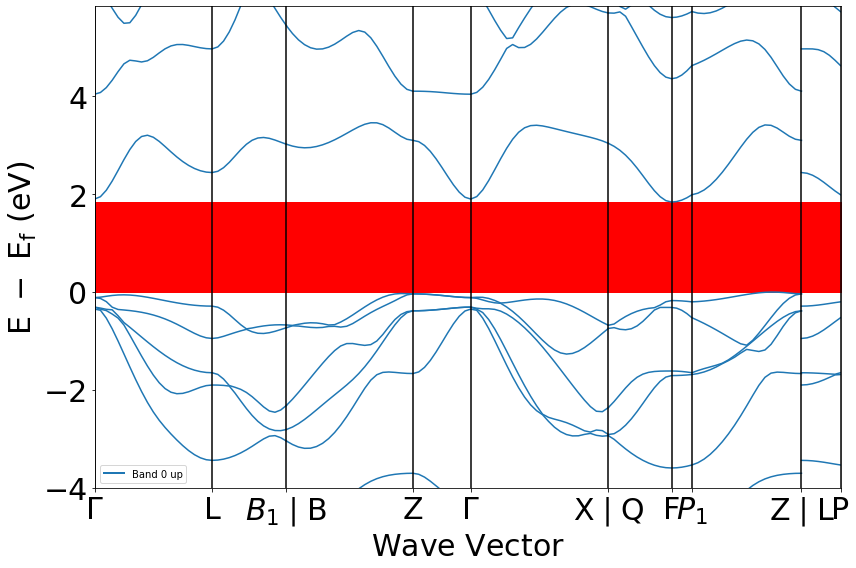

In [16]:
#plot
paths = data["distances"]
full_path = np.linspace(paths[0][0],paths[-1][-1],500)

plot.get_plot()
plt.fill_between(full_path,0,band_gap.get('energy'),color="red") #bande interdite

La bande interdite est représentée en rouge. Elle s'étend du sommet de la bande de valence (à 0 eV) jusqu'au minimum de la bande de conduction (à 1.84 eV).

<h2>Dispersion au sein de la dernière bande de valence<h2>

In [17]:
#Calcul de la plus grande pente ainsi que la plus petite
energies = data["energy"]

Smax = 0
Smin = 99
imax = 0
imin = 0

for i in range(len(paths)) :
    diff = abs(energies["1"][i][15][0] - energies["1"][i][15][-1]) #energies["1"][numéro du chemin][numéro de la bande][indice dans la liste]
    if Smax < diff :
        Smax = diff
        imax = i
    if Smin > diff :
        Smin = diff
        imin = i
        
print("La plus grande dispersion à lieu dans le chemin {} : B1|B - Z".format(imax+1))
print("La plus petite dispersion à lieu dans le chemin {} : F - P1".format(imin+1))

La plus grande dispersion à lieu dans le chemin 3 : B1|B - Z
La plus petite dispersion à lieu dans le chemin 7 : F - P1


<h2>Dispersion au sein de la première bande de conduction<h2>

In [18]:
#Calcul de la plus grande pente ainsi que la plus petite
energies = data["energy"]

Smax = 0
Smin = 99
imax = 0
imin = 0

for i in range(len(paths)) :
    diff = abs(energies["1"][i][16][0] - energies["1"][i][16][-1]) #energies["1"][numéro du chemin][numéro de la bande][indice dans la liste]
    if Smax < diff :
        Smax = diff
        imax = i
    if Smin > diff :
        Smin = diff
        imin = i
        
print("La plus grande dispersion à lieu dans le chemin {} : X|Q - F".format(imax+1))
print("La plus petite dispersion à lieu dans le chemin {} : B1|B - Z".format(imin+1))

La plus grande dispersion à lieu dans le chemin 6 : X|Q - F
La plus petite dispersion à lieu dans le chemin 3 : B1|B - Z


<img src="files/bands.PNG">
Les plus grandes dispersions sont représentées par les flèches rouges, et les plus petites dispersions par des flèches vertes.

<h2>Masse effective au sommet de la dernière bande de valence<h2>

La masse effective est calculée de la manière suivante :
<img src="files/mass.PNG">
ou ħ est la constante de Planck réduite et ε est l'énergie dérivée deux fois par rapport au vecteur d'onde k.

In [19]:
#On suppose une dispersion parabolique : Connaissant le sommet et un point, on peut retrouver l'équation de la parabole.
# y = a(x-x_s)^2 + y_s : Avec (x_s, y_s) le sommet, et a un paramètre à déterminer grâce à un point de la parabole.

xs,ys = data["vbm"][0] #Sommet de la bande de valence, il se trouve dans le chemin P1 - Z|L
x = paths[7][14] #Point proche
y = energies["1"][7][15][14] #Point proche
a = (y-ys)/(x-xs)**2

print("La parabole a pour équation y = {}(k-{})^2".format(a,xs))

dEdk = 2*a #Dérivée seconde [eV.A°^2]
dEdk = dEdk * 10**(-20) * 1.602176634*10**(-19) #[J.m^2]
hbar = 1.054571817*10**(-34) #[J.s]
meff = hbar**2/dEdk

print("m* = {} kg".format(meff))

La parabole a pour équation y = -0.6158811710279491(k-5.485262660370041)^2
m* = -5.635273585560187e-30 kg


<h2>Masse effective à la base de la première bande de conduction<h2>

In [20]:
#On suppose une dispersion parabolique : Connaissant le sommet et un point, on peut retrouver l'équation de la parabole.
# y = a(x-x_s)^2 + y_s : Avec (x_s, y_s) le sommet, et a un paramètre à déterminer grâce à un point de la parabole.

xs,ys = data["cbm"][0] #Sommet de la bande de conduction, il se trouve dans le chemin P1 - Z|L
x = paths[6][1] #Point proche
y = energies["1"][6][16][1] #Point proche
a = (y-ys)/(x-xs)**2

print("La parabole a pour équation y = {}(k-{})^2 + {}".format(a,xs,ys))

dEdk = 2*a #Dérivée seconde [eV.A°^2]
dEdk = dEdk * 10**(-20) * 1.602176634*10**(-19) #[J.m^2]
hbar = 1.054571817*10**(-34) #[J.s]
meff = hbar**2/dEdk

print("m* = {} kg".format(meff))

La parabole a pour équation y = 5.901438801510003(k-4.6790404624196675)^2 + 1.8412000000000002
m* = 5.881038525807704e-31 kg
